<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Business Statistics</center></font></h1>
<h1><center>Common Statistical Tests - Week 3</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2020/08/21/18/53/healthy-5506822__340.jpg" width="1000" height="600"></center>

<b><h1><center> Diet Case Study</center></h1></b>

## Problem Statement

### Business Context

From children to adults to the elderly, the importance of a balanced diet can't be emphasized enough for any age group for a healthy lifestyle. A proper, well-balanced meal plan helps to attain ideal body weight and reduce the risk of chronic diseases like diabetes, cardiovascular and other types of cancer.

**The Health Company**, which provides various diet plans for weight loss, conducted a market test experiment to test three different kinds of diets (A, B, C). Each of the volunteers was given one of the three diet plans and asked to follow the diet for 6 weeks.


### Objective

In order to understand the effectiveness of each of the different diets for weight loss, the executives of the company reached out to you, a data scientist at the company. The weights before starting the diet and the weight 6 weeks after following the diet were recorded for **78 volunteers** who were provided with either of the three diet plans. You have been asked to perform a **statistical analysis to find evidence of whether the mean weight losses with respect to the three diet plans are significantly different**. Consider a 5% significance level for the analysis.


### Data Dictionary

The *diet.csv* file contains the following information:

1. diet: Type of the diet
2. preweight: Weight (in kg) before following the diet plan
3. weight6weeks: Weight (in kg) after 6 weeks of following the diet plan

## Exploring the dataset

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### Reading the data into a dataframe

In [2]:
df=pd.read_csv('diet.csv')

### Data overview

The initial steps to get an overview of any dataset is to: 
- observe few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Exploring few rows

In [3]:
df.head()

,diet,preweight,weight6weeks
0,B,60,60.0
1,B,103,103.0
2,A,58,54.2
3,A,60,54.0
4,A,64,63.3


* The dataset contains the diet type, pre-weight and weight after 6 weeks for one person in each row.

#### Cehcking the shpae, the data types, and missng values

In [4]:
# information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


* The dataset contains 78 rows and 3 columns
* The `Diet` column is categorical. While, `preweight` and `weight6weeks` are numerical.
* There are no missing values in the dataset

#### Statistical summary

In [5]:
# distinct values of Diet
df.diet.value_counts()

B    27
C    27
A    24
Name: diet, dtype: int64

In [7]:
df.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


* The average weight before any diet plan is 72.53 kg, while the average weight after 6 weeks of a diet plan is 68.68 kg. Overall, taking a diet has reduced the average weight.
* The dispersion in the weights is very similar before and after taking a diet. 

**ADEL'S ADD-ON**: As mentioned in the problem statement, there are three types of diet plans: A, B, and C and we are interested in the variations in weight for each group. We can make a summary statitics grouped by A, B, and C.

In [9]:
# summary of the dataset
df.groupby('diet').describe()

preweight                                                        \
         count       mean        std   min    25%   50%   75%    max   
diet                                                                   
A         24.0  72.875000   8.383796  58.0  66.75  72.0  80.0   88.0   
B         27.0  71.111111  10.093156  58.0  63.00  71.0  78.0  103.0   
C         27.0  73.629630   7.606415  60.0  68.00  73.0  78.0   88.0   

     weight6weeks                                                            
            count       mean        std   min     25%    50%     75%    max  
diet                                                                         
A            24.0  69.575000   8.398356  54.0  63.825  69.25  74.825   84.5  
B            27.0  68.085185  10.217207  55.0  60.200  66.80  72.800  103.0  
C            27.0  68.481481   8.242807  53.0  61.700  68.90  74.850   81.9

* Overall it can be seen that weights have been reduced after taking a diet for all three groups.

### Creating a new column 'weightloss'

To assess the loss in weight after taking a diet plan, we shall create a new column `weightloss` by subtracting the weight before taking the diet from the weight after taking the diet.

In [11]:
# weightloss = (post-weight) - (pre-weight)
df['weightloss'] = df['weight6weeks'] - df['preweight']
df.head()

,diet,preweight,weight6weeks,weightloss
0,B,60,60.0,0.0
1,B,103,103.0,0.0
2,A,58,54.2,-3.8
3,A,60,54.0,-6.0
4,A,64,63.3,-0.7


#### Visualize data

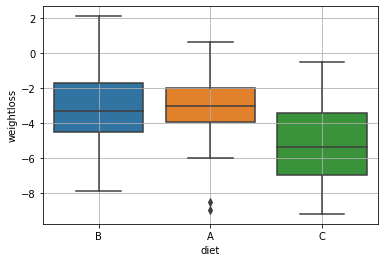

In [7]:
# visual analysis of the weightloss for the three diet-plans
sns.boxplot(x="diet", y="weightloss", data = df)
plt.grid()
plt.show()

* The distribution of weight loss seem to differ among the three groups.
* Diet plan C seems to impact the highest weight loss.
* The median weight loss seems to be very close for the plans A and B, but the variation is higher in the weight-losses by diet-plan B as compared to A.
* Is the observed difference in weight loss among the three groups significant enough to conclude the same about the three diet plans? To determine this, we will test the difference using a statistical test.

## Hypothesis testing

### Step 1: Define null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean weight losses with respect to each diet category is equal. <br>
> $H_a$ : At least one of the mean weight losses with respect to the three diet category is different.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

- We will use the `f_oneway()` function from the `scipy.stats` library to perform a one-way ANOVA test.
- The `f_oneway()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test. 
    - The sample observations are the values of weight losses with respect to the three diet-plans.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

* Samples are independent simple random samples (we supose this is the case)

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The weight losses follow a normal distribution

against the alternative hypothesis

>$H_a:$ The weight losses do not not follow a normal distribution

In [12]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df['weightloss']) 
print('The p-value is', p_value)

The p-value is 0.8019816875457764


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [13]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df[df['diet']=='A']['weightloss'],
                            df[df['diet']=='B']['weightloss'],
                            df[df['diet']=='C']['weightloss'])
print('The p-value is', p_value)

The p-value is 0.5376731304274011


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 5: Calculate the p-value

The the f_oneway function f the sats module, we need to create a vector for each group

In [14]:
# separate the weightlosses with respect to the three diet-plans
weightloss_diet_A = df[df['diet']=='A']['weightloss']
weightloss_diet_B = df[df['diet']=='B']['weightloss']
weightloss_diet_C = df[df['diet']=='C']['weightloss']

In [15]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(weightloss_diet_A, weightloss_diet_B, weightloss_diet_C)
print('The p-value is ', p_value)

The p-value is  0.0032290142385893524


### Step 6: Compare the p-value with $\alpha$

In [16]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0032290142385893524 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean weight losses with respect to the three diet plans are different.

## Conclusion
* From the sample data, it was observed that taking a diet has reduced the average weight


* The variation in the weights is very similar before and after taking a diet


* From the sample data, it was observed that the diet-plan C has resulted in higher weight loss as compared to the other two plans


* There was enough statistical evidence to say that the effect on weight loss is different for at least one of the diet plans


* Further statistical analysis can be done to determine if the impact of diet-plan C is significantly greater than the other two plans

## ADEL ADD-ON: Multiple Comparison test (Tuckey HSD)

In order to identify for which group mean is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_A=𝜇_B \text{ and } 𝜇_A=𝜇_C \text{ and } 𝜇_B=𝜇_C$

against the alternative hypothesis

 > $𝐻_a: 𝜇_A\neq𝜇_B \text{ or } 𝜇_A\neq𝜇_C \text{ or } 𝜇_B\neq𝜇_C$

In [17]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df['weightloss'], groups = df['diet'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.2741    0.9 -1.3325  1.8806  False
     A      C  -1.8481 0.0201 -3.4547 -0.2416   True
     B      C  -2.1222 0.0048 -3.6808 -0.5636   True
----------------------------------------------------


Since the p-values comparing A, B to C are lower than the significance level, we reject the null hypothesis that the former two groups have means equal to the mean of the latter group.